Integrantes:

Oscar Guzmán

*   Oscar Guzmán
*   Carlos Cueva

Correo del profe: jmcursosingenieria111@gmail.com

Ejercicios y Problemas.  

**Resumen Automático de Texto:** Utilizar un modelo Transformer para crear un
sistema de resumen automático de texto. El modelo debe ser capaz de leer un
documento largo y resumirlo en unas pocas oraciones.   

**Generación de Imágenes:** Los interesados en la generación de imágenes, pueden
usar una arquitectura GAN (Redes Generativas Adversarias) basada en
transformers para generar imágenes realistas.

Necesitamos torch y torch.nn para construir y manejar la red neuronal.  
math se usará para cálculos matemáticos, como la raíz cuadrada.

**Problema 1**  
comenzaremos importando la librería transformers para poder usar el modelo solicitado por el problema

In [9]:
!pip install transformers

se comienza añadiendo la librería files de colab para poder añadir un archivo .txt y así obtener el contenido del documento a procesar

In [16]:
from google.colab import files

# Cargar el archivo de texto
uploaded = files.upload()

# Obtener el nombre del archivo cargado
archivo_nombre = next(iter(uploaded))

# Leer el contenido del archivo
with open(archivo_nombre, 'r', encoding='utf-8') as file:
    texto_largo = file.read()

Saving texto.txt to texto (1).txt


se puede imprimir los 500 caracteres iniciales para verificar que el documenta haya sido correctamente cargado

In [17]:
print("Parte del texto original:")
print(texto_largo[:500])

Parte del texto original:
La programación genética ha sido una técnica poderosa para el diseño automatizado de heurísticas de programación de producción. Muchos estudios han demostrado que las heurísticas desarrolladas mediante programación genética pueden superar a muchas heurísticas existentes diseñadas manualmente en la literatura. La flexibilidad de la programación genética también le permite descubrir heurísticas muy sofisticadas para hacer frente a entornos de producción complejos y dinámicos. Sin embargo, en compa


se añade la librería y se carga el modelo para poder usarlo en nuestro código

In [19]:
from transformers import pipeline

resumen = pipeline("summarization", model="t5-small")

In [20]:
resumen_texto = resumen(texto_largo, max_length=150, min_length=50, do_sample=False)

In [22]:
print("\nResumen:")
print(resumen_texto[0]['summary_text'])


Resumen:
la programación genética ha sido una técnica poderosa para el diseo automatizado de heursticas de producción de la literatura .


**Problema 2**  
Estamos utilizando PyTorch para la implementación de redes neuronales y la biblioteca transformers para trabajar con modelos basados en transformers. MNIST es un conjunto de datos simple que usaremos para la generación de imágenes, aunque en proyectos más avanzados podríamos utilizar conjuntos de datos más complejos.

In [1]:
# Instalar las bibliotecas necesarias
!pip install torch torchvision transformers

# Importar las bibliotecas necesarias
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

Hemos cargado el conjunto de datos MNIST, que consiste en imágenes de dígitos manuscritos. Cada imagen es preprocesada para ser normalizada. También hemos visualizado algunas imágenes para confirmar que los datos se han cargado correctamente.

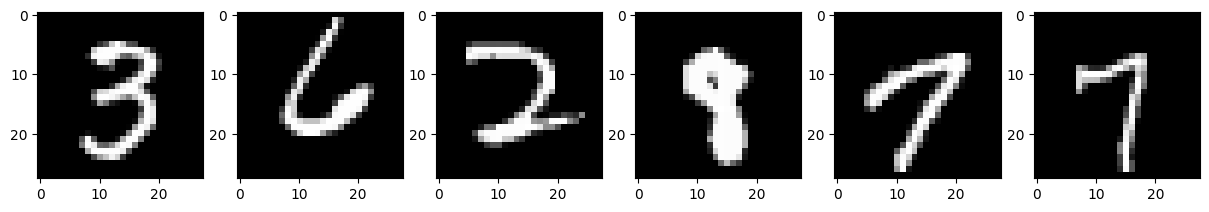

In [4]:
# Definir las transformaciones de los datos
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Cargar el conjunto de datos MNIST
mnist_data = MNIST(root='./data', train=True, download=True, transform=transform)
data_loader = DataLoader(mnist_data, batch_size=64, shuffle=True)

# Mostrar algunas imágenes del conjunto de datos
examples = iter(data_loader)
example_data, example_targets = next(examples)

fig, ax = plt.subplots(1, 6, figsize=(15, 15))
for i in range(6):
    ax[i].imshow(example_data[i][0], cmap='gray')
plt.show()


Hemos definido el generador y el discriminador. El generador toma un vector aleatorio y lo transforma en una imagen, mientras que el discriminador toma una imagen y determina si es real o generada. La arquitectura es sencilla para fines didácticos, pero puede ser ampliada para casos más complejos.

In [5]:
class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(100, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 784),
            torch.nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(784, 512),
            torch.nn.LeakyReLU(0.2),
            torch.nn.Linear(512, 256),
            torch.nn.LeakyReLU(0.2),
            torch.nn.Linear(256, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Instanciar el generador y el discriminador
generator = Generator()
discriminator = Discriminator()

# Definir los optimizadores
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002)

# Definir la función de pérdida
criterion = torch.nn.BCELoss()


Hemos implementado el bucle de entrenamiento para nuestra GAN. Entrenamos el discriminador con imágenes reales y falsas y actualizamos sus pesos. Luego entrenamos el generador para producir imágenes que el discriminador clasifique como reales. Durante el entrenamiento, mostramos las imágenes generadas para evaluar el progreso visualmente.

Epoch [0/50] Batch [0/938] Loss D: 0.7839469909667969, Loss G: 3.7036006450653076


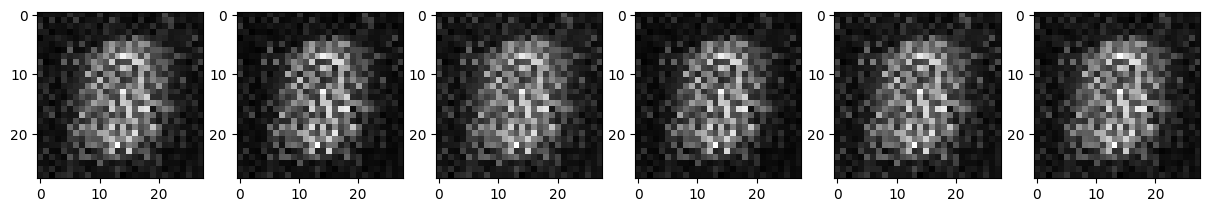

Epoch [1/50] Batch [0/938] Loss D: 0.3739067316055298, Loss G: 3.838630199432373


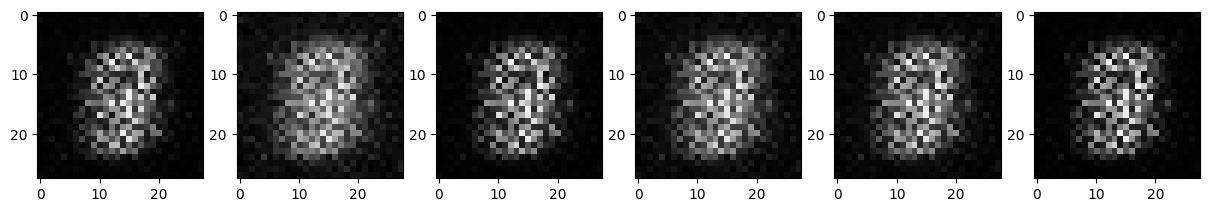

Epoch [2/50] Batch [0/938] Loss D: 0.2597005367279053, Loss G: 3.1407454013824463


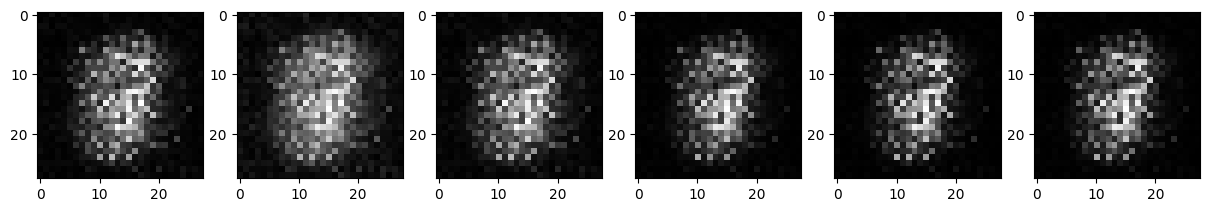

Epoch [3/50] Batch [0/938] Loss D: 0.2141256034374237, Loss G: 3.076850175857544


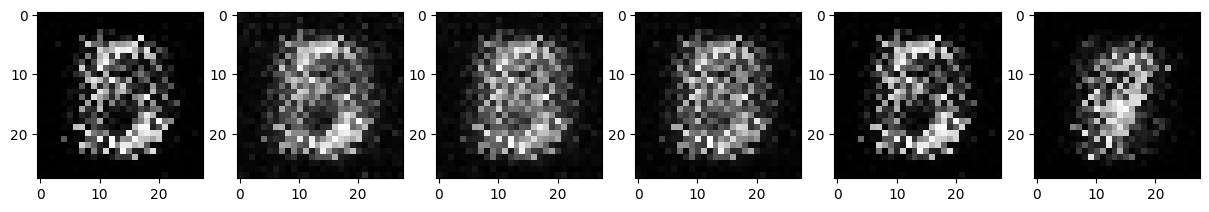

Epoch [4/50] Batch [0/938] Loss D: 0.1878015100955963, Loss G: 5.8850202560424805


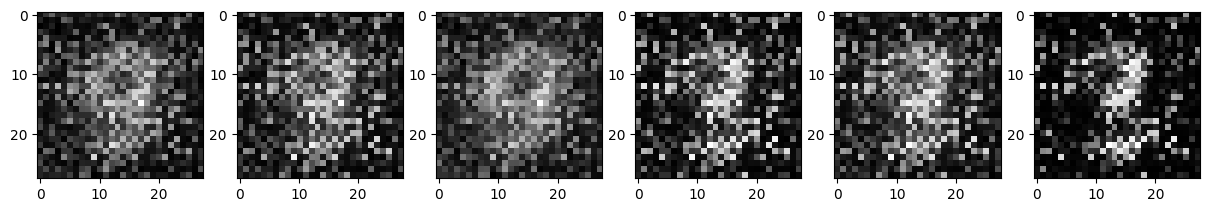

Epoch [5/50] Batch [0/938] Loss D: 0.05795448273420334, Loss G: 6.318983554840088


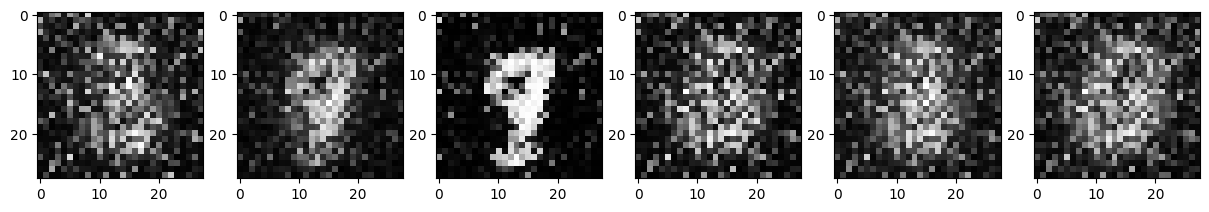

Epoch [6/50] Batch [0/938] Loss D: 0.2801147699356079, Loss G: 5.189972877502441


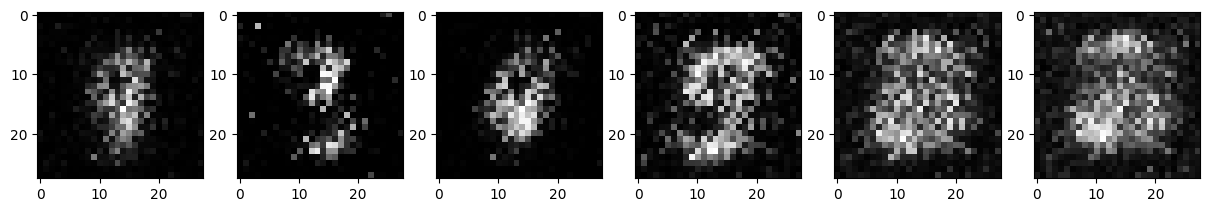

Epoch [7/50] Batch [0/938] Loss D: 0.1283988654613495, Loss G: 4.67432165145874


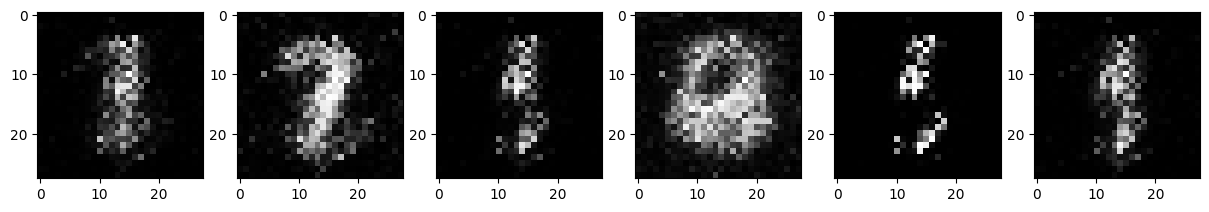

Epoch [8/50] Batch [0/938] Loss D: 0.2746571898460388, Loss G: 5.088681221008301


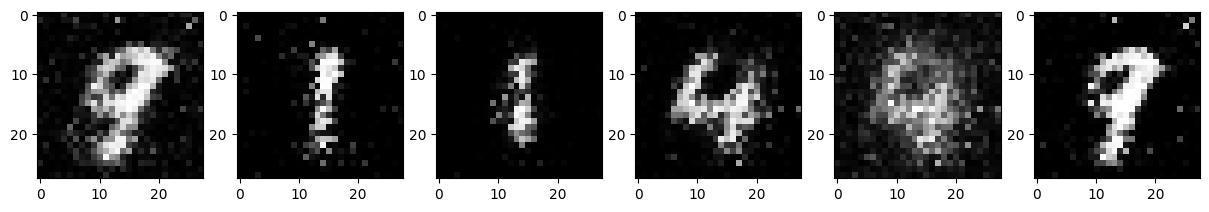

Epoch [9/50] Batch [0/938] Loss D: 0.08702100068330765, Loss G: 6.021919250488281


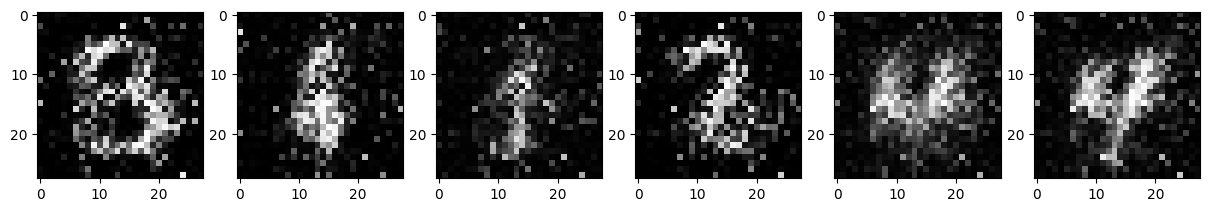

Epoch [10/50] Batch [0/938] Loss D: 0.18049156665802002, Loss G: 4.142185211181641


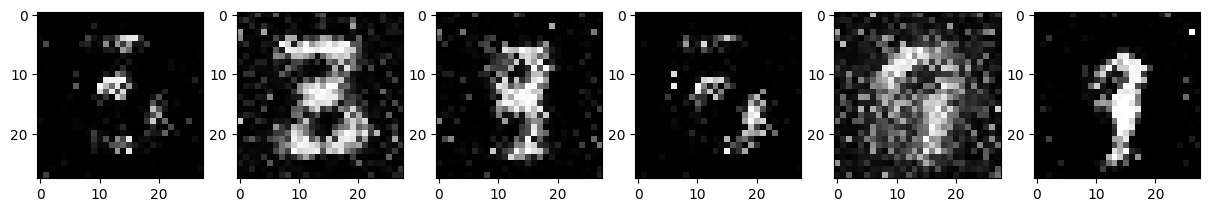

Epoch [11/50] Batch [0/938] Loss D: 0.2792080342769623, Loss G: 3.536306858062744


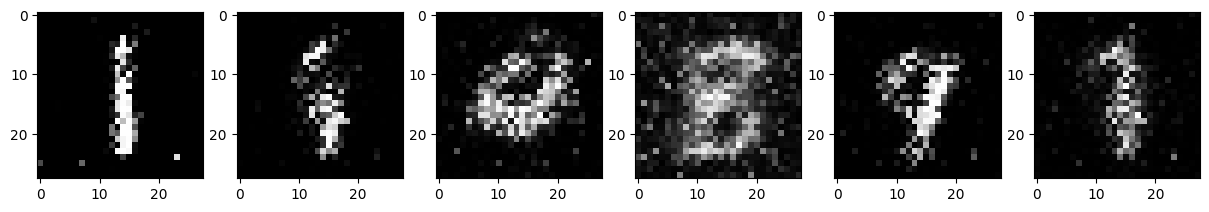

Epoch [12/50] Batch [0/938] Loss D: 0.1997273862361908, Loss G: 4.183314323425293


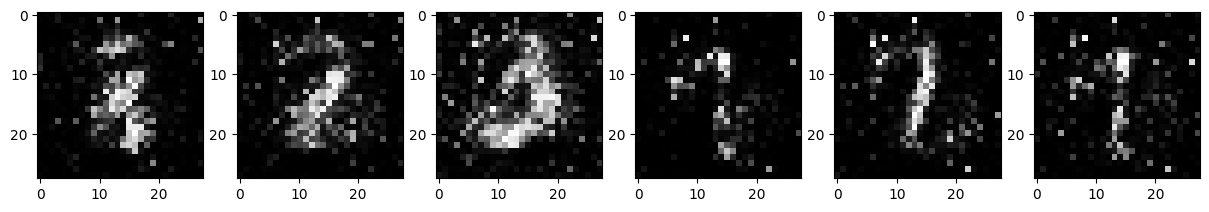

Epoch [13/50] Batch [0/938] Loss D: 0.4508575201034546, Loss G: 4.838784217834473


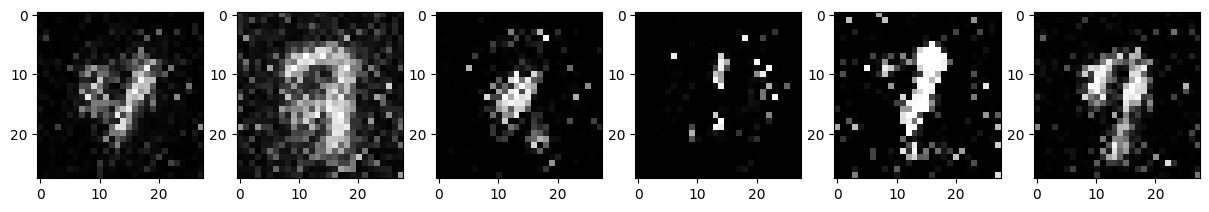

Epoch [14/50] Batch [0/938] Loss D: 0.3838818073272705, Loss G: 2.6376895904541016


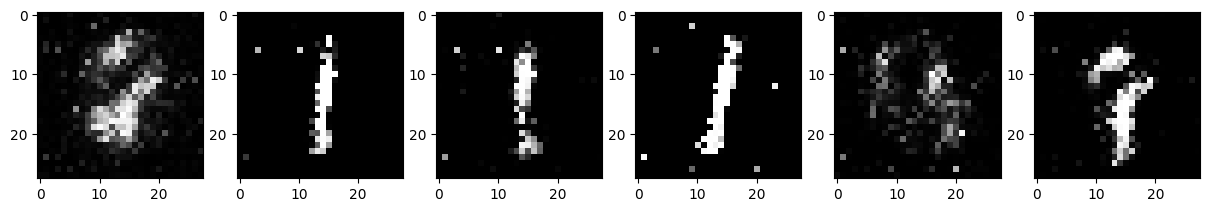

Epoch [15/50] Batch [0/938] Loss D: 0.14661234617233276, Loss G: 5.957337856292725


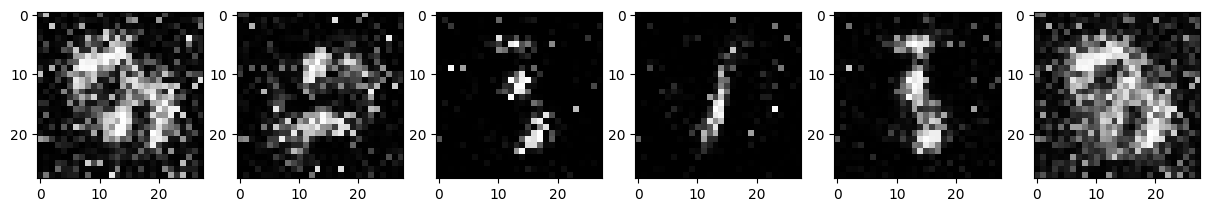

Epoch [16/50] Batch [0/938] Loss D: 0.24677881598472595, Loss G: 3.427067995071411


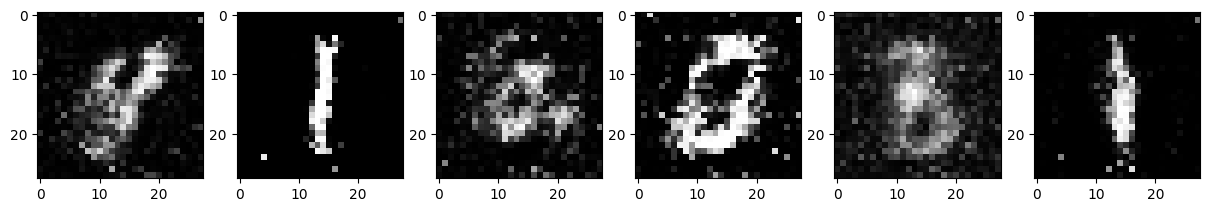

Epoch [17/50] Batch [0/938] Loss D: 0.38939207792282104, Loss G: 1.9285621643066406


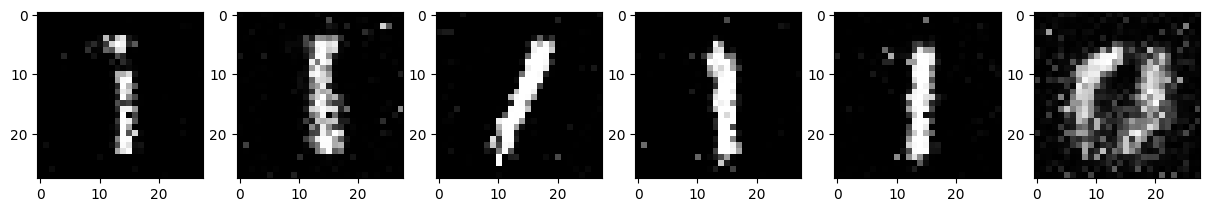

Epoch [18/50] Batch [0/938] Loss D: 0.46982789039611816, Loss G: 3.0612783432006836


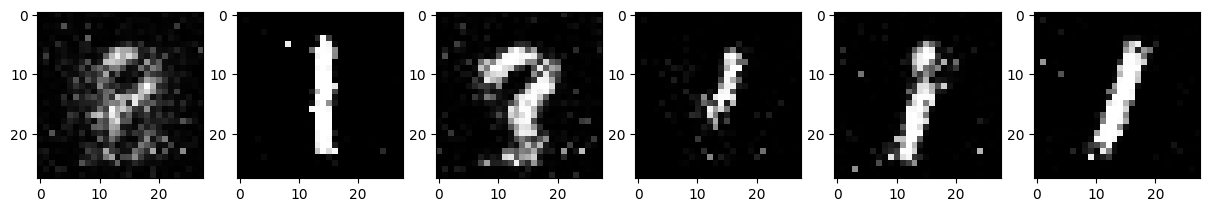

Epoch [19/50] Batch [0/938] Loss D: 0.27868831157684326, Loss G: 3.220562696456909


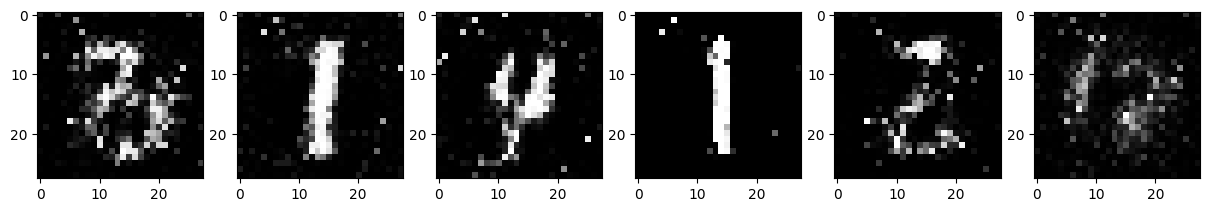

Epoch [20/50] Batch [0/938] Loss D: 0.454243004322052, Loss G: 3.3452281951904297


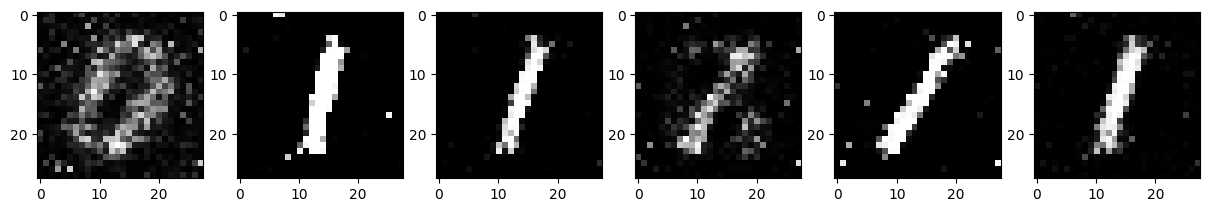

Epoch [21/50] Batch [0/938] Loss D: 0.5484371781349182, Loss G: 3.4482247829437256


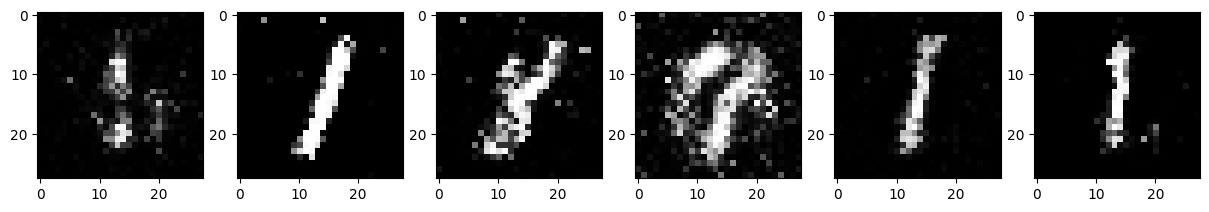

Epoch [22/50] Batch [0/938] Loss D: 0.5972393155097961, Loss G: 3.038055658340454


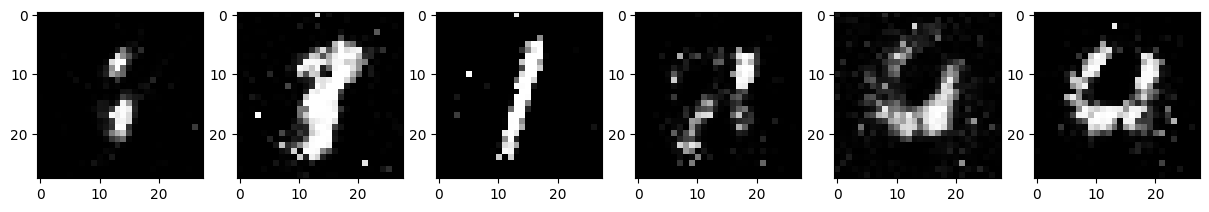

Epoch [23/50] Batch [0/938] Loss D: 0.6366656422615051, Loss G: 2.5680782794952393


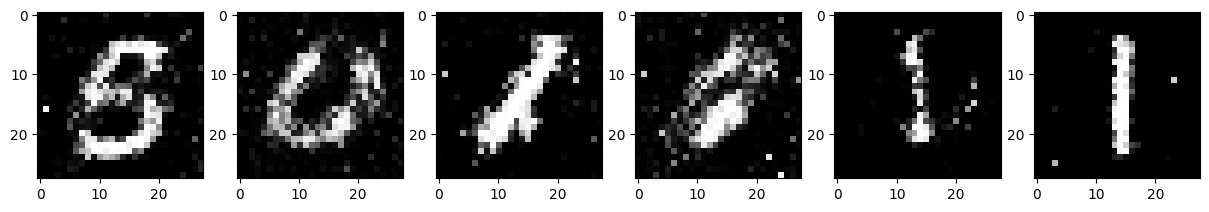

Epoch [24/50] Batch [0/938] Loss D: 0.6036623120307922, Loss G: 2.9982450008392334


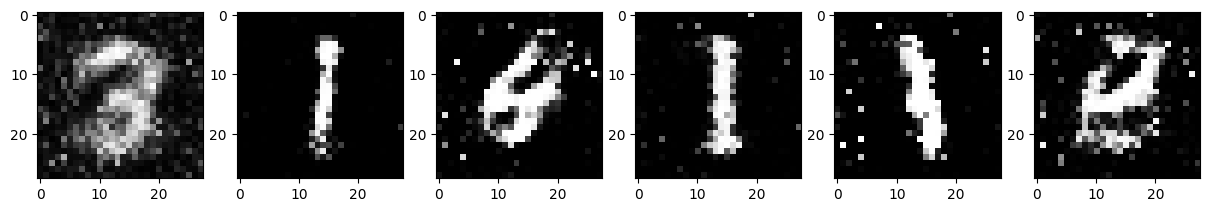

Epoch [25/50] Batch [0/938] Loss D: 0.5083128213882446, Loss G: 3.830167293548584


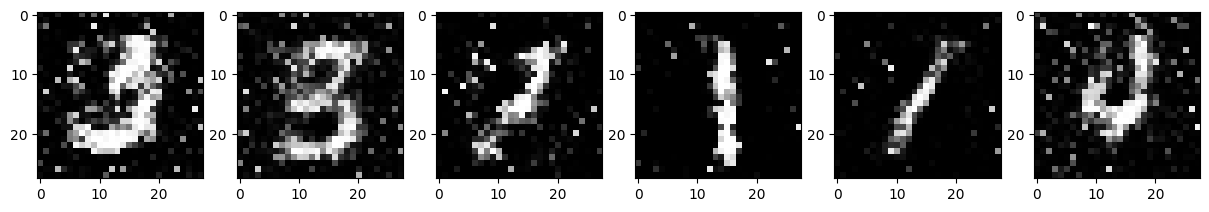

Epoch [26/50] Batch [0/938] Loss D: 0.3444673418998718, Loss G: 2.8398349285125732


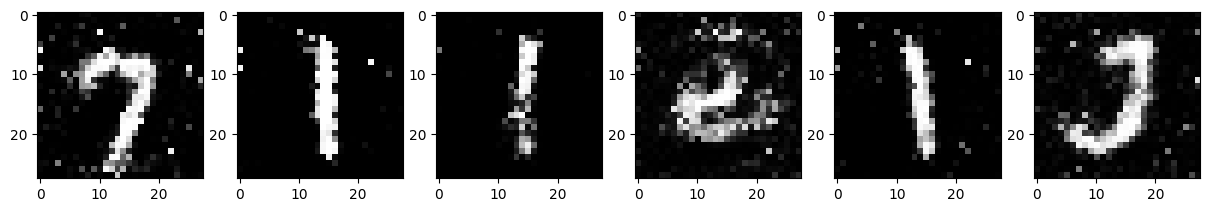

Epoch [27/50] Batch [0/938] Loss D: 0.48346051573753357, Loss G: 3.42087459564209


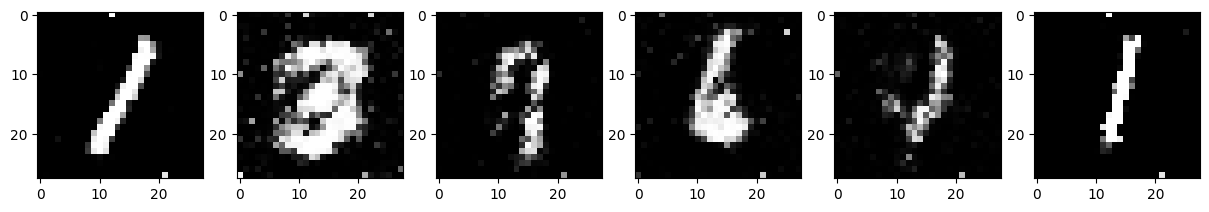

Epoch [28/50] Batch [0/938] Loss D: 0.6793111562728882, Loss G: 2.1273393630981445


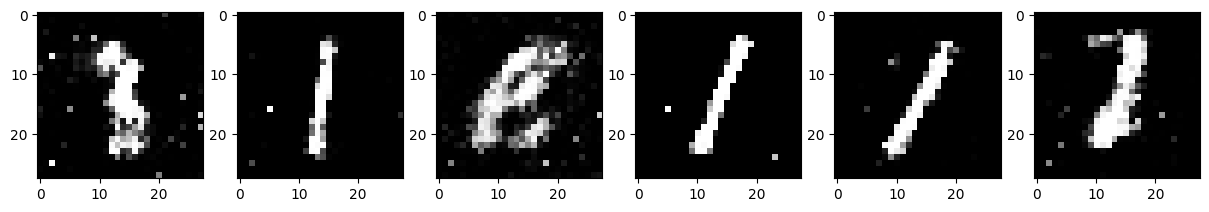

Epoch [29/50] Batch [0/938] Loss D: 0.44801729917526245, Loss G: 2.932687997817993


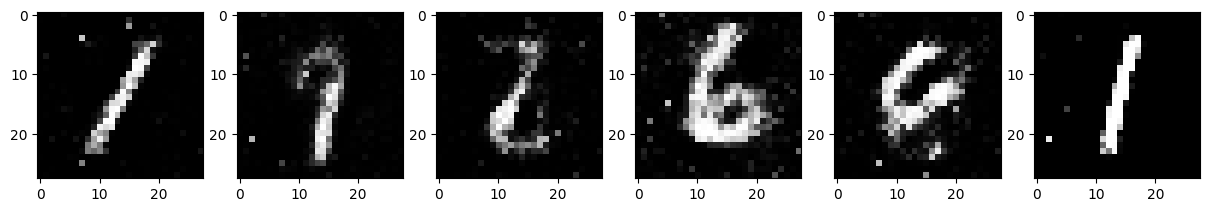

Epoch [30/50] Batch [0/938] Loss D: 0.6501465439796448, Loss G: 2.310123920440674


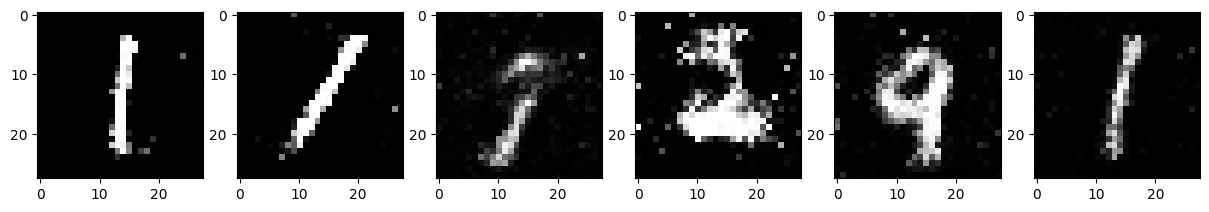

Epoch [31/50] Batch [0/938] Loss D: 0.623225748538971, Loss G: 2.6263418197631836


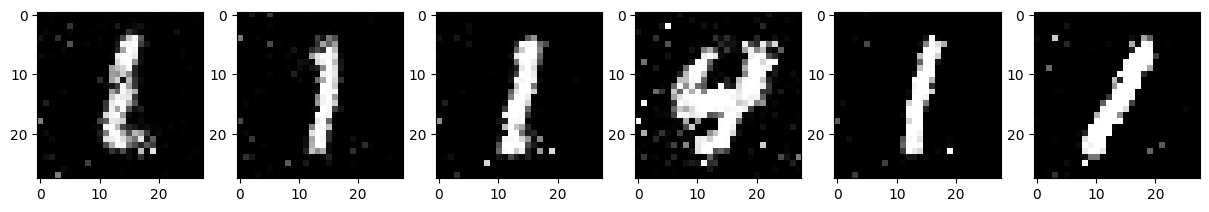

Epoch [32/50] Batch [0/938] Loss D: 0.28464534878730774, Loss G: 3.002556085586548


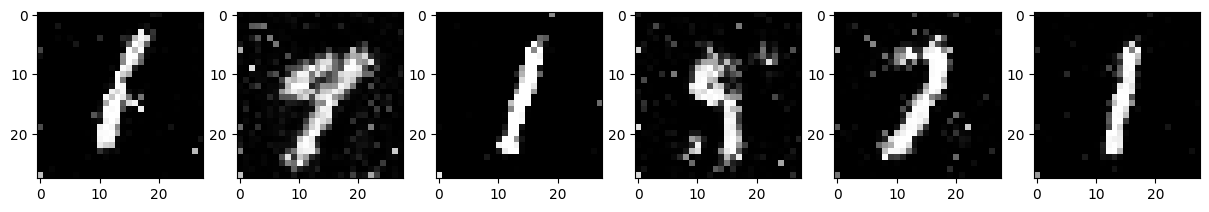

Epoch [33/50] Batch [0/938] Loss D: 0.4534914493560791, Loss G: 4.832815170288086


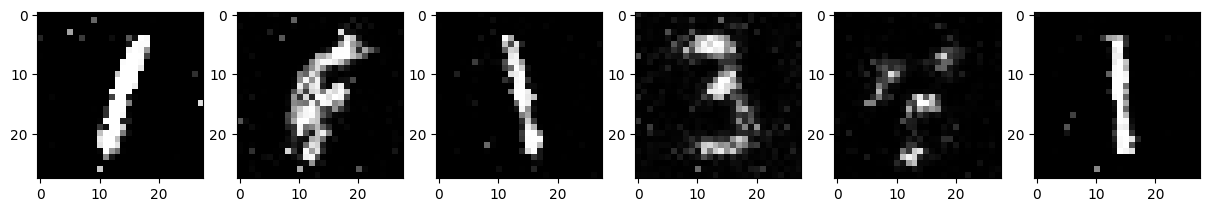

Epoch [34/50] Batch [0/938] Loss D: 1.1896812915802002, Loss G: 1.4361844062805176


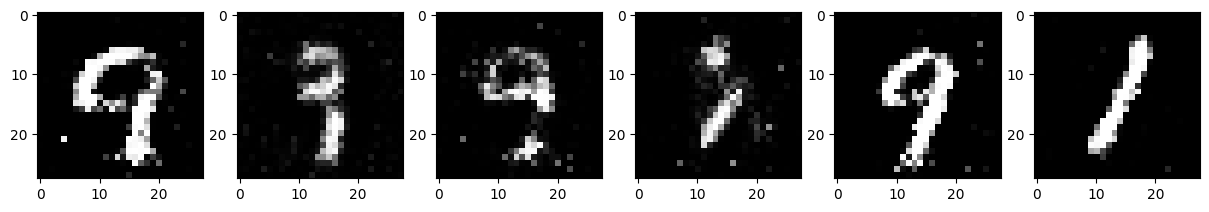

Epoch [35/50] Batch [0/938] Loss D: 0.6709092855453491, Loss G: 1.8989837169647217


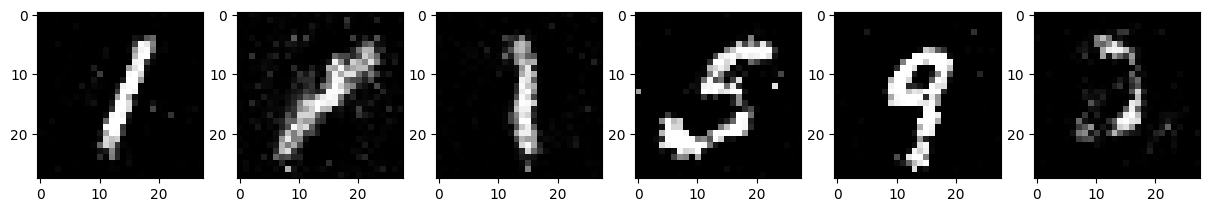

Epoch [36/50] Batch [0/938] Loss D: 0.5424290895462036, Loss G: 2.312326669692993


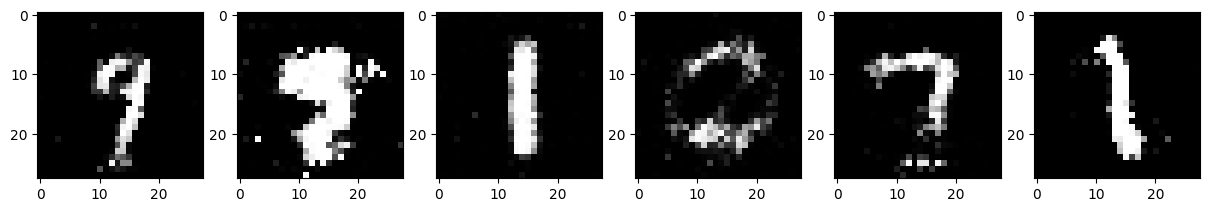

Epoch [37/50] Batch [0/938] Loss D: 0.7435875535011292, Loss G: 2.1111249923706055


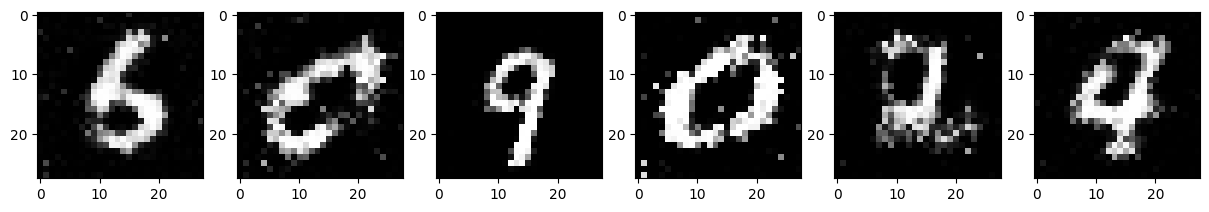

Epoch [38/50] Batch [0/938] Loss D: 0.9339512586593628, Loss G: 2.5684573650360107


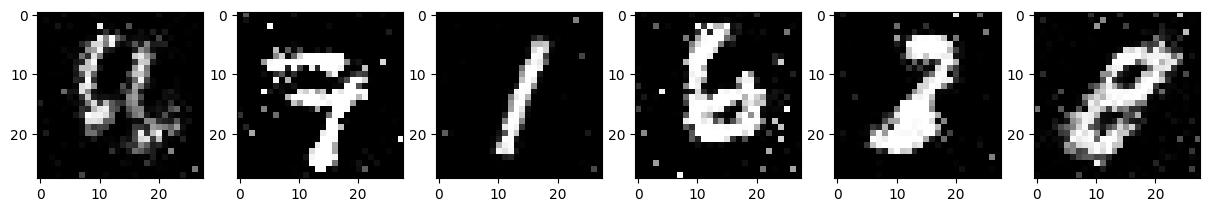

Epoch [39/50] Batch [0/938] Loss D: 0.5404301285743713, Loss G: 3.5932960510253906


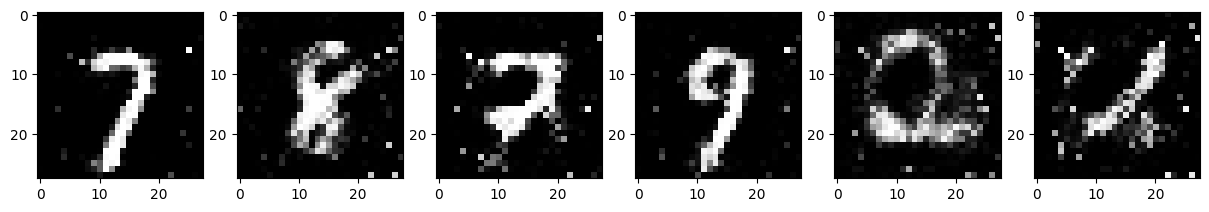

Epoch [40/50] Batch [0/938] Loss D: 0.7704068422317505, Loss G: 2.6113414764404297


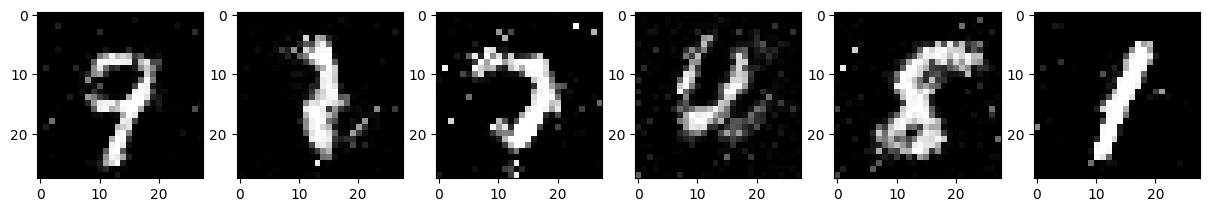

Epoch [41/50] Batch [0/938] Loss D: 0.5988496541976929, Loss G: 1.9582147598266602


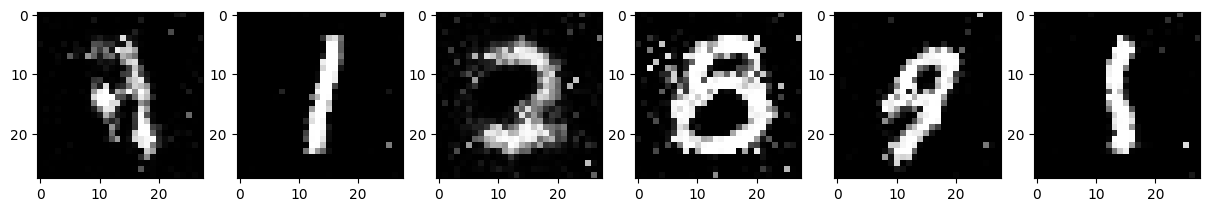

Epoch [42/50] Batch [0/938] Loss D: 1.1256000995635986, Loss G: 1.900476098060608


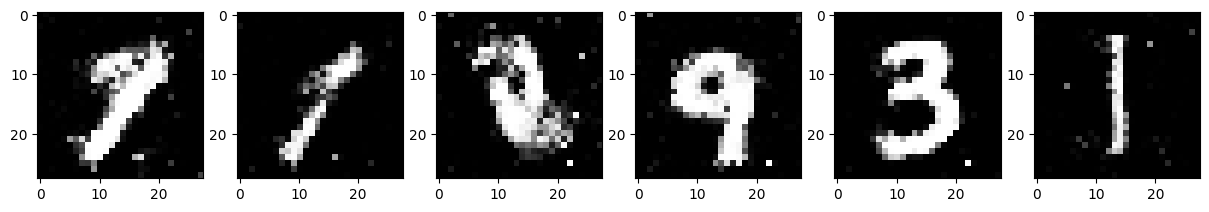

Epoch [43/50] Batch [0/938] Loss D: 0.47549131512641907, Loss G: 2.359178066253662


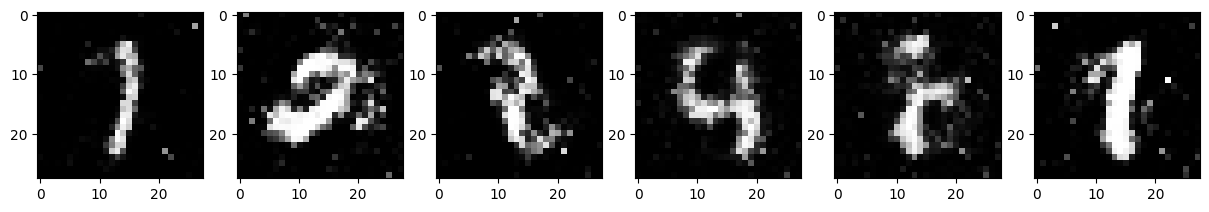

Epoch [44/50] Batch [0/938] Loss D: 0.7603895664215088, Loss G: 2.591313362121582


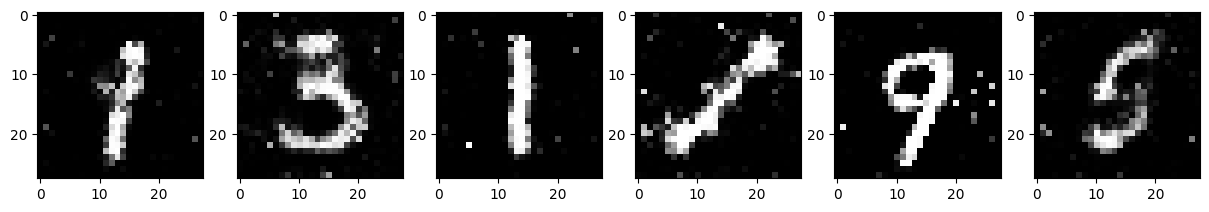

Epoch [45/50] Batch [0/938] Loss D: 0.43330132961273193, Loss G: 3.492868661880493


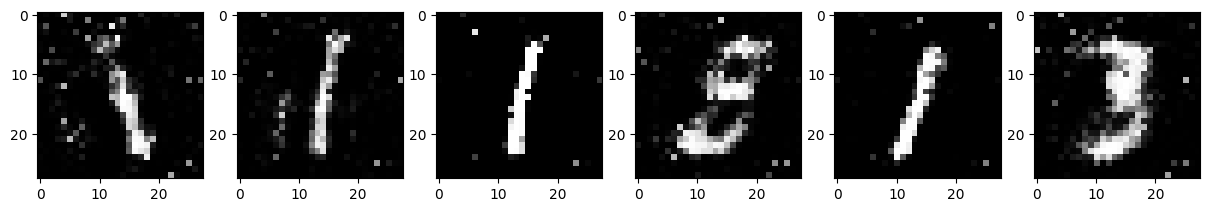

Epoch [46/50] Batch [0/938] Loss D: 0.69826340675354, Loss G: 1.6528041362762451


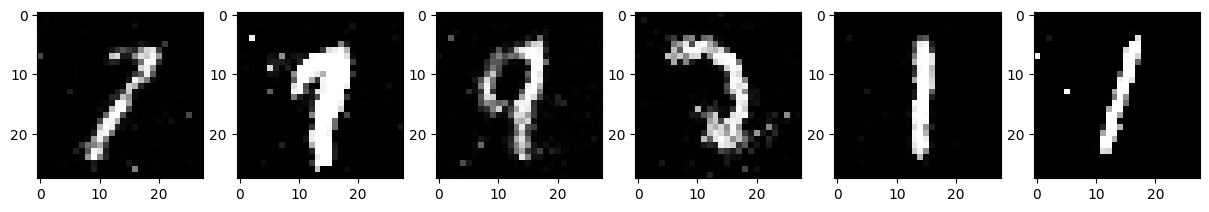

Epoch [47/50] Batch [0/938] Loss D: 0.7836394309997559, Loss G: 2.609926223754883


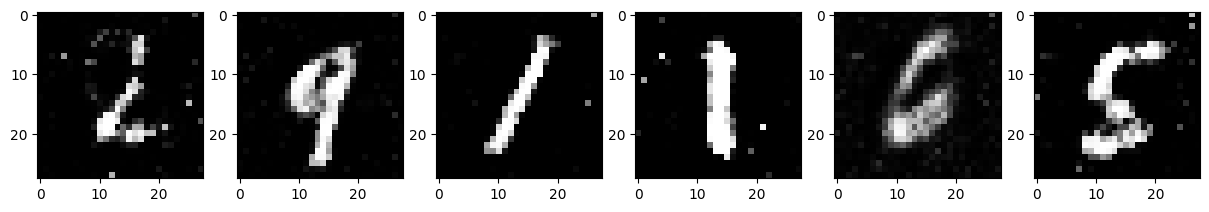

Epoch [48/50] Batch [0/938] Loss D: 1.2108110189437866, Loss G: 2.076176643371582


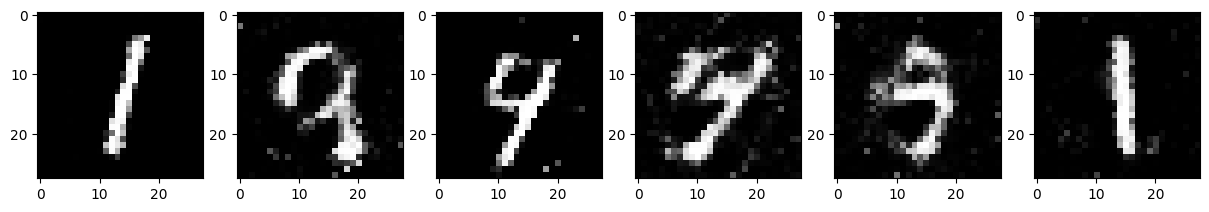

Epoch [49/50] Batch [0/938] Loss D: 0.7465068101882935, Loss G: 2.5789690017700195


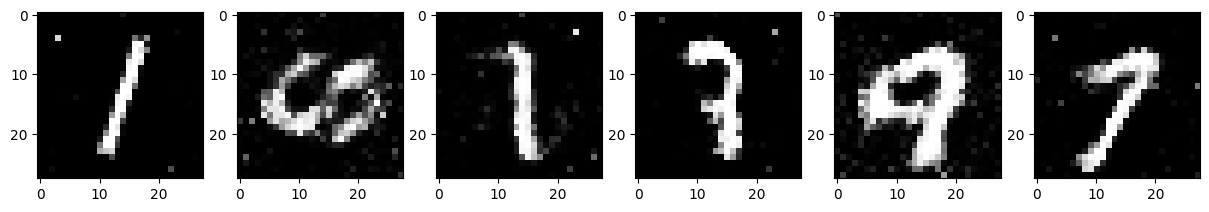

In [7]:
# Parámetros de entrenamiento
epochs = 50
sample_interval = 1000

for epoch in range(epochs):
    for i, (imgs, _) in enumerate(data_loader):

        # Preparar las imágenes reales
        real_imgs = imgs.view(imgs.size(0), -1)
        real_labels = torch.ones(imgs.size(0), 1)
        fake_labels = torch.zeros(imgs.size(0), 1)

        # Generar imágenes falsas
        z = torch.randn(imgs.size(0), 100)
        fake_imgs = generator(z)

        # Entrenar el discriminador
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_imgs), real_labels)
        fake_loss = criterion(discriminator(fake_imgs), fake_labels)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Entrenar el generador
        optimizer_G.zero_grad()
        z = torch.randn(imgs.size(0), 100)
        fake_imgs = generator(z)
        g_loss = criterion(discriminator(fake_imgs), real_labels)
        g_loss.backward()
        optimizer_G.step()

        # Guardar y mostrar los resultados
        if i % sample_interval == 0:
            print(f"Epoch [{epoch}/{epochs}] Batch [{i}/{len(data_loader)}] Loss D: {d_loss.item()}, Loss G: {g_loss.item()}")
            fake_imgs = fake_imgs.view(fake_imgs.size(0), 1, 28, 28)
            fake_imgs = fake_imgs[:6]
            fig, ax = plt.subplots(1, 6, figsize=(15, 15))
            for j in range(6):
                ax[j].imshow(fake_imgs[j][0].detach().numpy(), cmap='gray')
            plt.show()


Hemos utilizado el generador entrenado para producir nuevas imágenes. Mostramos una cuadrícula de imágenes generadas para observar la calidad y realismo de las imágenes producidas por la GAN.

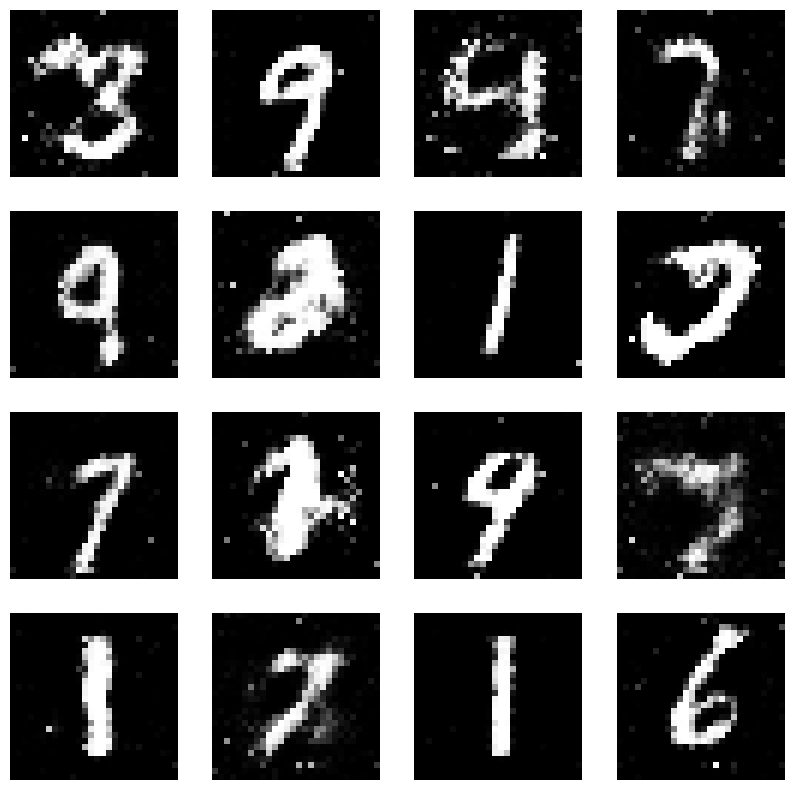

In [8]:
# Generar imágenes nuevas
z = torch.randn(16, 100)
generated_imgs = generator(z)

# Mostrar las imágenes generadas
generated_imgs = generated_imgs.view(generated_imgs.size(0), 1, 28, 28)
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(generated_imgs[i*4 + j][0].detach().numpy(), cmap='gray')
        ax[i, j].axis('off')
plt.show()
